In [1]:
from src.visualisation import *

from tqdm import tqdm

import torch
import numpy as np

from scipy.stats import norm

from hvs_hsi_pytorch.utils import hsi_utils
from hvs_hsi_pytorch.hs_image import HSImage

In [2]:
img_path = "data/finger_data/session_001/P010001_V03_iHSI_T01_2022-07-28-16-16-54/raw/frame_000181_raw.png"
white_path = "data/finger_data/session_001/exported_white_2022-07-15-20-29-45.png"
tensor_path = "tensors/generic_000181_200_4.pt"

data = torch.load(tensor_path)
img = hsi_utils.load_frame(img_path)
white = hsi_utils.load_sample(white_path)

hsi_origin = HSImage(array=img, wavelengths=None, camera="imec 4x4-VIS-15.7.15.4")
hsi_origin.reconstruct(white=white, dark=None, rho=15, method="flatfield")

data.shape

torch.Size([2228224, 400])

In [3]:
mu = np.zeros(data.shape[0])
std = np.zeros(data.shape[0])

with tqdm(total=data.shape[0]) as pbar:
    for i, j in enumerate(data):
        temp1, temp2 = norm.fit(j)
        mu[i] = temp1
        std[i] = temp2
        pbar.update(1)

mu = torch.tensor(mu.reshape((1088, 2048)))
std = torch.tensor(std.reshape((1088, 2048)))
sample = data[:, 5].reshape((1088, 2048, 1))

100%|██████████| 2228224/2228224 [00:29<00:00, 75538.99it/s]


torch.Size([1088, 2048])


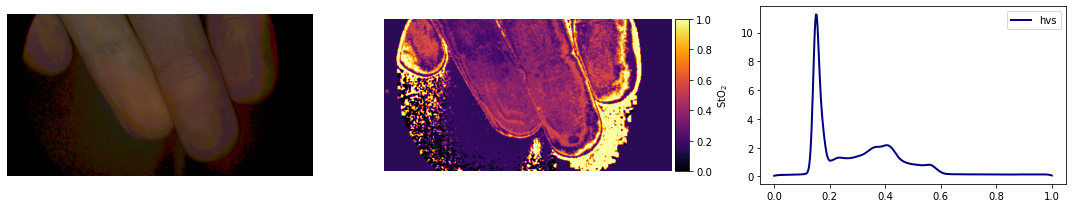

In [4]:
show_hvs_combo(hsi_origin, mask=False)

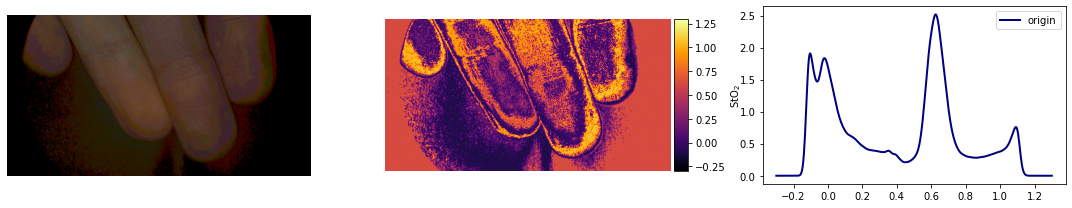

In [5]:
show_inn_combo_origin(hsi_origin, sample, mask=False, aim_range=(-0.3, 1.3))

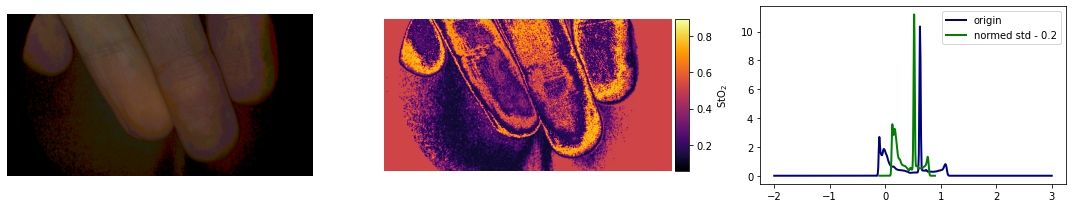

In [6]:
show_inn_combo_norm(hsi_origin, mu, mask=False)

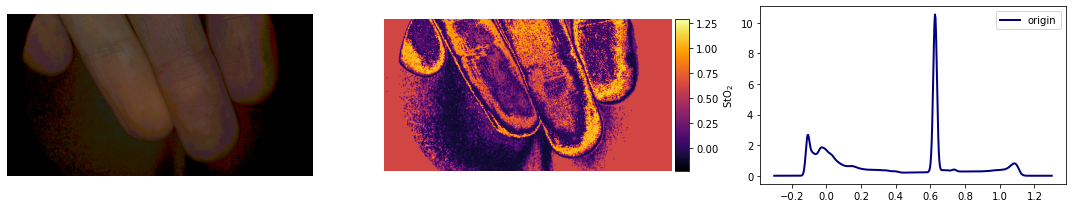

In [7]:
show_inn_combo_origin(hsi_origin, mu, mask=False, aim_range=(-0.3, 1.3))

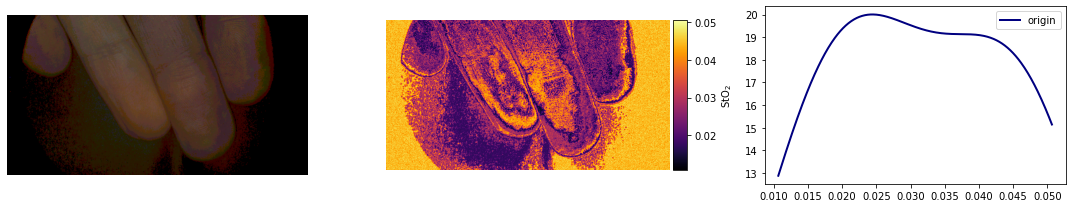

In [11]:
show_inn_combo_origin(hsi_origin, std, mask=False, aim_range=(std.median()-0.02, std.median()+0.02))